# Decision Tree Algorithm - Classification

## Data set

In [1]:
import os
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Projects\\Github\\Projects and Codes\\Machine Learning\\Decision Tree Classification and Regression'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('weather.csv', index_col = 'Day')
df

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes


In [31]:
target = df.Play.value_counts()
target

Yes    9
No     5
Name: Play, dtype: int64

In [12]:
target.sum()

14

### Calculating entropy of target variable
$$Entropy :\sum_{i=0}^n -p_i*log_2(p_i)$$


In [13]:
import math

In [21]:
def prob_cal(var,tot):
    pdict ={}
    for i in var.index:
        pdict[i] = round(var[i]/tot,3)
    return pdict

In [29]:
def entropy(var):
    probdict = prob_cal(var, var.sum())

    return round(sum([val * math.log(val,2) for val in probdict.values()]),3)

In [32]:
ent_target = entropy(target) * -1
print(f'Target Entropy : {ent_target}')

#target['Yes']/target.sum() * math.log(target['Yes']/target.sum(),2)

Target Entropy : 0.94


In [26]:
outlookgrp = df.groupby(['Outlook','Play'])['Play'].count()
outlookgrp

Outlook   Play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
Name: Play, dtype: int64

In [33]:
def ent_variable(df):
    uvals = df.iloc[:,0].unique()
    colnames = df.columns
    grp = df.groupby([colnames[0],colnames[-1]])[colnames[-1]].count()
    entlist=[]
    for var in uvals:
        probval = sum(prob_cal(grp[var],len(df)).values())
        entlist.append(probval * (-1 * entropy(grp[var])))
    return(round(ent_target - sum(entlist),3))


In [34]:
target = df.iloc[:,-1]

for col in df.iloc[:,0:-1].columns:
    vardf = pd.concat([df[col],target],axis=1)
    print(col, ent_variable(vardf))

Outlook 0.247
Temperature 0.029
Humidity 0.151
Wind 0.048


# Regression
## Dataset

In [113]:
df = pd.read_excel('Weather.xlsx', index_col = 'Day')
df

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
1,Sunny,Hot,High,Weak,25
2,Sunny,Hot,High,Strong,30
3,Overcast,Hot,High,Weak,46
4,Rain,Mild,High,Weak,45
5,Rain,Cool,Normal,Weak,52
6,Rain,Cool,Normal,Strong,23
7,Overcast,Cool,Normal,Strong,43
8,Sunny,Mild,High,Weak,35
9,Sunny,Cool,Normal,Weak,38


In [114]:
df['Outlook'] = df['Outlook'].replace({'Sunny':1,'Overcast':2,'Rain':3})
df['Temperature'] = df['Temperature'].replace({'Hot':1,'Mild':2,'Cool':3})
df['Humidity'] = df['Humidity'].replace({'High':1,'Normal':2})
df['Wind'] = df['Wind'].replace({'Weak':1,'Strong':2})
df

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
1,1,1,1,1,25
2,1,1,1,2,30
3,2,1,1,1,46
4,3,2,1,1,45
5,3,3,2,1,52
6,3,3,2,2,23
7,2,3,2,2,43
8,1,2,1,1,35
9,1,3,2,1,38


### Calculating SDR for target variable

In [ ]:
import numpy as np

In [18]:
t_mean = round(df.Play.mean(),2)
t_std = round(df.Play.std(ddof=0),2)
print(f'Target Mean: {t_mean}, STD: {t_std}')

Target Mean: 39.79, STD: 9.32


In [17]:
t_std = round(df.Play.std(ddof=0),2)
t_std

9.32

In [93]:
def SDR(df,tar_std):
    uvals = df.iloc[:,0].unique()
    colnames = df.columns
    grpcount = df[colnames[0]].value_counts()
    grpstd = df.groupby([colnames[0]])[colnames[-1]].std(ddof=0)
    entlist=[]
    for var in uvals:
        probval = grpcount[var]/len(df)
        entlist.append(probval * grpstd[var])
    return(round(tar_std - sum(entlist),3))

In [94]:
target = df.iloc[:,-1]
target_std = round(target.std(ddof= 0),2)
print(target_std)

output = {}
for col in df.iloc[:,0:-1].columns:
    vardf = pd.concat([df[col],target],axis=1)
    output[col] = SDR(vardf,target_std)

9.32


In [76]:
output

{'Outlook': 1.661, 'Temperature': 0.479, 'Humidity': 0.271, 'Wind': 0.281}

In [77]:
sunnydf = df[df.Outlook == 'Sunny']
sunnydf

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
1,Sunny,Hot,High,Weak,25
2,Sunny,Hot,High,Strong,30
8,Sunny,Mild,High,Weak,35
9,Sunny,Cool,Normal,Weak,38
11,Sunny,Mild,Normal,Strong,48


In [80]:
sunnysd = round(sunnydf.Play.std(ddof=0),2)
sunnysd

7.78

In [95]:
target = sunnydf.iloc[:,-1]
target_std = round(target.std(ddof= 0),2)
print(target_std)

output = {}
for col in sunnydf.iloc[:,1:-1].columns:
    vardf = pd.concat([sunnydf[col],target],axis=1)
    output[col] = SDR(vardf,target_std)
output    

7.78


{'Temperature': 4.18, 'Humidity': 3.331, 'Wind': 0.845}

In [86]:
ocdf = df[df.Outlook == 'Overcast']
ocdf

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
3,Overcast,Hot,High,Weak,46
7,Overcast,Cool,Normal,Strong,43
12,Overcast,Mild,High,Strong,52
13,Overcast,Hot,Normal,Weak,44


In [96]:
target = ocdf.iloc[:,-1]
target_std = round(target.std(ddof= 0),2)
print(target_std)

output = {}
for col in ocdf.iloc[:,1:-1].columns:
    vardf = pd.concat([ocdf[col],target],axis=1)
    output[col] = SDR(vardf,target_std)
output 

3.49


{'Temperature': 2.99, 'Humidity': 1.74, 'Wind': 0.74}

In [88]:
raindf = df[df.Outlook == 'Rain']
raindf

,Outlook,Temperature,Humidity,Wind,Play
Day,,,,,
4,Rain,Mild,High,Weak,45
5,Rain,Cool,Normal,Weak,52
6,Rain,Cool,Normal,Strong,23
10,Rain,Mild,Normal,Weak,46
14,Rain,Mild,High,Strong,30


In [97]:
target = raindf.iloc[:,-1]
target_std = round(target.std(ddof= 0),2)
print(target_std)

output = {}
for col in raindf.iloc[:,1:-1].columns:
    vardf = pd.concat([raindf[col],target],axis=1)
    output[col] = SDR(vardf,target_std)
output 

10.87


{'Temperature': 0.679, 'Humidity': 0.371, 'Wind': 7.615}

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

y = df['Play']
X = df.iloc[:,0:-1]
#X_dummies = pd.get_dummies(X, drop_first = True)


In [116]:
dt = DecisionTreeRegressor(criteri)
dt.fit(X,y)

DecisionTreeRegressor()

In [117]:
X

,Outlook,Temperature,Humidity,Wind
Day,,,,
1,1,1,1,1
2,1,1,1,2
3,2,1,1,1
4,3,2,1,1
5,3,3,2,1
6,3,3,2,2
7,2,3,2,2
8,1,2,1,1
9,1,3,2,1


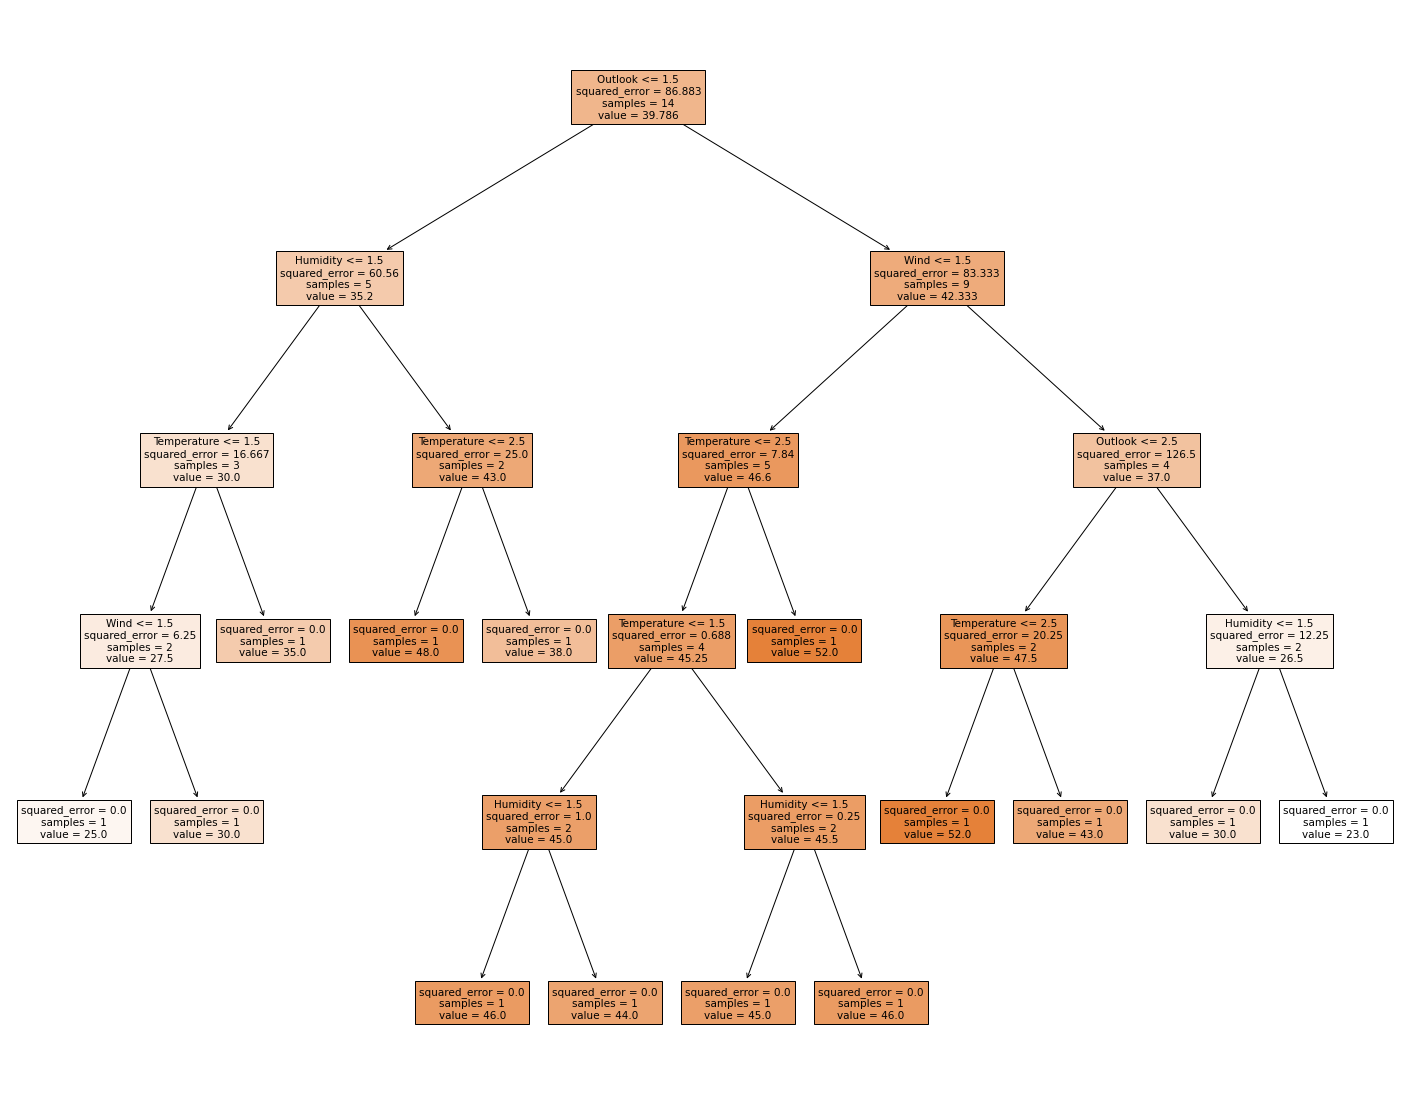

In [119]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names='Play',
                   filled=True)